# EquilibriumActor example

In [ ]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info);

### Initialize ITER case
[ITER case documentation](https://fuse.help/cases.html#ITER)

### CHEASE equilibrium grid
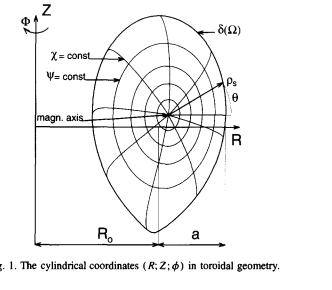

### setting the number of theta grid points to 80 helps with the x-point!

#### OMFIT CHEASE sets it to 40 (this is also the default in the CHEASE source code)

#### only takes 15% more time

In [ ]:
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium")
dd, ini, act = FUSE.init(:ITER, init_from=:scalars);
plot!(eq_plot, dd.equilibrium, label="ITER scalars SOLOVEV equilibrium")

### Setting up the equlibrium actor
The equilibrium actor selects which equilibrium model is used, right now the option are :CHEASE & :Solovev

In [ ]:
act.ActorEquilibrium.model = :CHEASE;

### Comparing Solovev with CHEASE equilibrium to the original ITER ods equilibrium

In [ ]:
### CHEASE
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium", coordinate=:psi)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false
FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, label="CHEASE equilibrium", coordinate=:psi))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 3"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium 4"))

### Solovev
#dd, ini, act = FUSE.init(:ITER, init_from=:ods);
#eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium")

In [ ]:
dd, ini, act = FUSE.init(:D3D);
FUSE.ActorSteadyStateCurrent(dd, act)
FUSE.ActorTauenn(dd, act)
FUSE.prepare(dd, :ActorCHEASE, act)


plot(dd.core_profiles.profiles_1d[], :pressure_thermal, label="cp")
display(plot!(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, dd.equilibrium.time_slice[].profiles_1d.pressure))
plot(dd.core_profiles.profiles_1d[], :j_tor, coordinate=:psi_norm)
display(plot!(dd.equilibrium.time_slice[].profiles_1d, :j_tor, coordinate=:psi_norm))


eq_plot = plot(dd.equilibrium, coordinate=:psi_norm, label="ITER ods equilibrium")#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false

FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, coordinate=:psi_norm, label="CHEASE equilibrium"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium,coordinate=:rho_tor_norm, label="CHEASE equilibrium 2"))

In [ ]:
dd, ini, act = FUSE.init(:D3D);
FUSE.ActorSteadyStateCurrent(dd, act)
FUSE.ActorTauenn(dd, act)
FUSE.prepare(dd, :ActorCHEASE, act)


plot(dd.core_profiles.profiles_1d[], :pressure_thermal, label="cp")
display(plot!(dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, dd.equilibrium.time_slice[].profiles_1d.pressure))
plot(dd.core_profiles.profiles_1d[], :j_tor, coordinate=:psi_norm)
display(plot!(dd.equilibrium.time_slice[].profiles_1d, :j_tor, coordinate=:psi_norm))


eq_plot = plot(dd.equilibrium, coordinate=:psi_norm, label="ITER ods equilibrium")#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false

FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, coordinate=:psi_norm, label="CHEASE equilibrium"))
#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium,coordinate=:rho_tor_norm, label="CHEASE equilibrium 2"))

In [ ]:
### CHEASE
dd, ini, act = FUSE.init(:D3D);
#FUSE.ActorSteadyStateCurrent(dd,act)
#FUSE.prepare(dd, :ActorCHEASE, act)

eq_plot = plot(dd.equilibrium, label="ITER ods equilibrium", coordinate=:psi)#,coordinate=:rho_tor_norm)
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false

actor_eq = FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, coordinate=:psi, label="CHEASE equilibrium"))

In [ ]:
import Equilibrium

dd2 = IMAS.json2imas("/Users/slendebroek/.julia/dev/CHEASE/templates/omas_geq.json")
display(plot(dd2.equilibrium))
IMAS.flux_surfaces(dd2.equilibrium)
plot!(dd2.equilibrium, coordinate=:rho_tor_norm)
#FUSE.gEQDSK2IMAS(gfile,dd2.equilibrium)
#display(plot(dd2.equilibrium))

In [ ]:
import Equilibrium
using Plots
using FUSE
gfile_pp = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g150219.03200_fix") # pp
gfile_np = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g133221.01151_fix")
gfile_nn = Equilibrium.readg("/Users/slendebroek/.julia/dev/VacuumFields/test/equilibria/g153298.04400_fix")

display(plot(gfile_nn.qpsi))
display(plot(gfile_nn.psi))
display(plot(gfile_nn.pres))
#display(plot(gfile_pp.qpsi))

dd, ini, act = FUSE.init(:D3D);
resize!(dd.equilibrium.time_slice, 1.0)
#dd.equilibrium.time_slice.time[1]=1

FUSE.gEQDSK2IMAS(gfile_nn, dd.equilibrium)
plot(dd.equilibrium, coordinate=:rho_tor_norm)

In [ ]:
### CHEASE
dd, ini, act = FUSE.init(:FPP, version=:v1_demount, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="FPP ODS eq")
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false

FUSE.ActorEquilibrium(dd, act)
display(plot!(eq_plot, dd.equilibrium, label="CHEASE equilibrium"))

#FUSE.ActorEquilibrium(dd,act)
#display(plot!(eq_plot,dd.equilibrium, label="CHEASE equilibrium"))

### Starting from scalars and running CHEASE

In [ ]:
dd, ini, act = FUSE.init(:FPP, version=:v1_demount, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="FPP ODS eq")

# CHEASE deadstart
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :CHEASE
dd = FUSE.init(dd, ini, act)
plot!(eq_plot, dd.equilibrium, label="CHEASE deadstart", color=:red)

# Solvev from scalars
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :Solovev
dd = FUSE.init(dd, ini, act)
display(plot!(eq_plot, dd.equilibrium, label="Solvev deadstart"))

### Finding a MXH parameterization of the boundary for ITER

In [ ]:
import MillerExtendedHarmonic: flat_coeffs
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eqt = dd.equilibrium.time_slice[]
eqt_bound = eqt.boundary.outline
psi_close = (eqt.profiles_1d.psi[end-1] + 5 * eqt.profiles_1d.psi[end]) / 6
r_bound, z_bound = IMAS.flux_surface(eqt, psi_close)

eq_plot = plot(r_bound, z_bound, label="0.99 of original boundary shape")
for order in [6]
    mxh = IMAS.MXH(r_bound, z_bound, order)
    @show round.(flat_coeffs(mxh), digits=5)
    plot!(mxh, label="MXH $order", lw=0.3)
end
display(plot!(eqt_bound.r, eqt_bound.z, label="original boundary shape", color="black", marker="x", lw=0, markersize=1))

## Comparing CHEASE deadstart from MXH parameterization vs Miller parameterization

In [ ]:
dd, ini, act = FUSE.init(:ITER, init_from=:ods);
eq_plot = plot(dd.equilibrium, label="ITER ODS eq")
display(eq_plot)

# CHEASE deadstart MXH
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :MXH_params
act.ActorEquilibrium.model = :CHEASE
dd = FUSE.init(dd, ini, act)
plot!(eq_plot, dd.equilibrium, label="CHEASE deadstart MXH")

# CHEASE deadstart MILLER
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :scalars
act.ActorEquilibrium.model = :CHEASE
act.ActorCHEASE.free_boundary = false
dd = FUSE.init(dd, ini, act)
display(plot!(eq_plot, dd.equilibrium, label="CHEASE deadstart Miller"))